In [ ]:
#### Provided by Somayeh Komeylian: PhD Student at UCSD & SDSU ####
# Natural Language Processing (NLP) Model #

# Two Datasets
    # ✅ Shakespeare – loaded from TensorFlow link
    # ✅ Shahnameh (Persian epic poem) – loaded via KaggleHub

# RNN Text Modeling: 
    # The RNN uses a self-supervised language modeling objective:
    # Each input sequence is paired with the next character (or token) from the same text. 
    # No manually labeled data is required.

# Tokenization Levels
    # An RNN (or LSTM/GRU) can model text at different tokenization levels:
        # Character-Level: Each character is a token; good for handling rare or unseen words.
        # Word-Level: Each word is a token; captures more semantic meaning but requires a larger vocabulary.
    # Here, we train a character-level RNN language model on the dataset. 

# References:
    # https://deeplearningwithpython.io/chapters/chapter15_language-models-and-the-transformer/ #
    # https://github.com/Alireza-Akhavan/transformers #

In [156]:
#### Option to keep or remove punctuation when tokenizing and preparing text for the NLP model ####

# Point 1:
# Autoregressive/causal LMs (e.g., GPT, LSTMs for next-token prediction) rely on exact token sequences.
# Punctuation provides essential information such as:
    # sentence boundaries
    # clause structure
    # pauses and emphasis
    # disambiguation
# Removing punctuation can degrade model performance unless the task explicitly requires simplified text (rare).# Point 1:


# Ponit 2:
# In practice: 
    # Small RNN or LSTM models with limited capacity
    # Trained on very small corpora
# may perform better when punctuation is removed, because:
    # it reduces vocabulary size
    # model doesn't waste capacity on rarely seen symbols
# But modern models typically keep punctuation even for small datasets unless there’s a task-specific reason.
# For *small datasets*, some practitioners remove punctuation to simplify the learning problem, but for larger datasets punctuation becomes essential 
# because it carries meaningful structure and helps the model understand sentence boundaries and context. 
# Therefore, we generally do not remove punctuation for *modern language-model training* or *large datasets*.
# With large datasets and larger models, punctuation improves:
                                        # syntactic understanding
                                        # coherence
                                        # long-range dependencies
                                        # generation quality
# This aligns with NLP best practices.


# Point 3:
# Whether to keep punctuation also depends on the *type of data and the task*. Preprocessing is always task-dependent.
# For example, when training models on programming languages such as C++, Python, or Java, punctuation and case sensitivity are crucial. 
# Programming languages rely on symbols ({}, ;, (), <>, etc.) to define syntax, and even capitalization matters.
    # For instance:
        # In C++, true starts with a lowercase t
        # In Python, True starts with an uppercase T
        # Removing punctuation or altering case would break the meaning of the code entirely.
        # Removing punctuation or changing case would:
                                        # break syntax
                                        # change meaning
                                        # make code unparsable
                                        # destroy training quality

In [ ]:
#### Key details of the NLP training process for the Shakespeare and Shahnameh datasets: ####

# 1. Dataset: Shakespeare’s Writing for the Model to Learn From: 
# To build a model that imitates Shakespeare, you need a dataset consisting of his works. 
# This typically includes: # Plays (e.g., Hamlet, Macbeth, Romeo and Juliet), # Sonnets, and # Poems


# 2. Data Processing: Representing Text as Data: 
# Neural networks work on numbers, not characters. So the text must be converted to a numerical representation.
#### If we are preparing the dataset for training, we should convert *strings* → *numeric IDs*:  
#### (1) Split text into tokens, and (2) Convert tokens to character IDs.

# The typical details:
# a. Clean the text
    # Lowercasing (optional)
    # Removing unusual characters
    # Consolidating spacing
# b. Split into sequences
    # RNNs learn patterns from sequences of characters or words.
        # For *character-level* training:
            # "but soft what light..."
            # is transformed into sequences like:
            # Input: "but sof"
            # Target: "ut soft"
            # Each character becomes a training pair. 
            # In other words, duplicate and shift sequences to produce (input, label) pairs.            
# c. Encode characters: Convert text array into scalar character elements. 
        # Create a vocabulary of all unique characters:
        # {'a': 0, 'b': 1, 'c': 2, ...}
        # Then convert:
        # "but soft" → [1, 20, 19, 0, 18, 14, 5, 19]
# d. Convert to tensors
        # 1. Batching:
            # 1.1.Take the raw character-encoded text
            # 1.2.Break it into fixed-length sequences (e.g., length 100): batch(sequence_length)
            # 1.3.Prepare the corresponding target sequences (shifted by one character)
                # Example:
                    # If your sequence length is 50:
                    # Input sequence: text[i : i+50]
                    # Target sequence: text[i+1 : i+51]
        # 2. Shuffling: 
        # Shuffling happens after sequences are created and before training begins.
        # If you train without shuffling, the model always sees:
            # Sequence 1 → Sequence 2 → Sequence 3 → Sequence 4 → ...
            # It starts to memorize that specific order, which is not what we want.
            # We want the model to learn general patterns, not the exact sequence positions.
        # Instead of feeding the model the sequences in the order they appear in the text (chronological order)
        # , shuffling mixes them up randomly so the model sees the data in a different order each epoch.
        # Shuffling prevents the model from overfitting to text order
# Sequences are batched and fed into the neural network.


# 3. Model Building & Training: Understanding the RNN Architecture
# A typical Shakespeare text generator uses:
    # RNN-based architectures:
        # Vanilla RNN (rare now)
        # LSTM (most common)
        # GRU
    # Model components:
        # 1. Embedding layer
            # Converts numeric characters → dense vector representations.
        # 2. Recurrent layer (LSTM/GRU)
            # Learns dependencies such as:
            # Sentence flow
            # Shakespearean phrasing
            # Word ordering
            # Rhythm and meter
        # 3. Fully connected layer
            # Predicts the next character’s probability distribution.
# Training process:
    # Use sequences of text as input.
    # Model predicts the next character.
    # Calculate loss (cross-entropy) between the prediction and the actual next character.
    # Backpropagate through time (BPTT).
    # Update weights via an optimizer (usually Adam).
    # Training continues until the model learns Shakespeare-like language patterns.



# 4. Text Generation: Imitate & Generate Shakespeare-Style Writing
# After training, the model can create new text. In pther words, we 
# should convert *numeric IDs* → *strings*. 
# (1) Convert character IDs to tokens, and (2) Join tokens into stings.
    
    # The typical details:
    # a. Give the model a prompt
    # b. Sampling process
    # The model repeatedly predicts the next character token:
        # 1. Model reads the prompt.
        # 2. Predicts probability distribution for the next character.
        # 3. Choose a character (using temperature-controlled sampling).
        # 4. Append it to the text.
        # 5. Feed the new character back into the model.
        # 6. Repeat until enough text is generated.
    # c. Temperature
        # Controls creativity:
        # Low (0.2–0.5): more predictable, structured, formal
        # Medium (0.7–1.0): balanced creativity
        # High (>1.2): chaotic, experimental

This is a companion notebook for the book [Deep Learning with Python, Third Edition](https://www.manning.com/books/deep-learning-with-python-third-edition). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

The book's contents are available online at [deeplearningwithpython.io](https://deeplearningwithpython.io).

In [ ]:
!pip install keras keras-hub --upgrade -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-nlp 0.21.1 requires keras-hub==0.21.1, but you have keras-hub 0.23.0 which is incompatible.


In [1]:
import os
os.environ["KERAS_BACKEND"] = "jax"

In [2]:
# @title
import os
from IPython.core.magic import register_cell_magic

@register_cell_magic
def backend(line, cell):
    current, required = os.environ.get("KERAS_BACKEND", ""), line.split()[-1]
    if current == required:
        get_ipython().run_cell(cell)
    else:
        print(
            f"This cell requires the {required} backend. To run it, change KERAS_BACKEND to "
            f"\"{required}\" at the top of the notebook, restart the runtime, and rerun the notebook."
        )

In [ ]:
# Find the length
text_length = len(code_text)
print("Length of the code text:", text_length)

## Language models and the Transformer

### The language model

#### Training a Shakespeare language model

In [4]:
import keras

filename = keras.utils.get_file(
    origin=(
        "https://storage.googleapis.com/download.tensorflow.org/"
        "data/shakespeare.txt"
    ),
)
shakespeare = open(filename, "r").read()

In [5]:
print(shakespeare[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



In [ ]:
import tensorflow as tf

sequence_length = 100

def split_input(input, sequence_length):
    for i in range(0, len(input), sequence_length):
        yield input[i : i + sequence_length]

features = list(split_input(shakespeare[:-1], sequence_length))
labels = list(split_input(shakespeare[1:], sequence_length))
dataset = tf.data.Dataset.from_tensor_slices((features, labels))


# shakespeare[:-1] → all characters except the last one → used as inputs.
# shakespeare[1:] → all characters except the first one → used as labels/targets.
# Why shift by 1?
# This is standard for next-character prediction:
    # Input: "H e l l o"
    # Label: "e l l o "
    # The model learns to predict the next character.

# list(split_input(...)) 
# → converts the generator into a list of sequences, each of length 100.


# Summary / Workflow
# 1. You have the text shakespeare.
# 2. You split it into chunks of 100 characters.
# 3. Features are all chunks except the last character, labels are all chunks shifted by 1.
# 4. You create a TensorFlow dataset to feed these sequences into a model for training.


In [ ]:
# 1️⃣ Get a batch / single element from the dataset
x, y = next(dataset.as_numpy_iterator())
# dataset is a tf.data.Dataset object.
# dataset.as_numpy_iterator() converts the dataset into a Python iterator that yields NumPy arrays instead of TensorFlow tensors.
# next() retrieves the first element from that iterator.
# So after this line:
    # x → contains the first feature sequence from the dataset (a chunk of text).
    # y → contains the corresponding label sequence (the next characters for prediction).
# Example:
    # If the first feature sequence is "HELLO WORL..." (100 chars),
    # then the corresponding label sequence is "ELLO WORLD..." (next 100 chars).


# 2️⃣ Slice the first 50 elements
x[:50], y[:50]
# x[:50] → takes the first 50 characters of the feature sequence.
# y[:50] → takes the first 50 characters of the label sequence.
# This is usually done to preview the data without printing the entire sequence.


# 3️⃣ What this does overall
    # Converts the TensorFlow dataset into a NumPy-friendly format.
    # Retrieves the first sequence of features and labels.
    # Shows the first 50 characters of both input (x) and target (y).

(b'First Citizen:\nBefore we proceed any further, hear',
 b'irst Citizen:\nBefore we proceed any further, hear ')

In [ ]:
# 1️⃣ Import Keras layers
from keras import layers

# 2️⃣ Create a TextVectorization layer
tokenizer = layers.TextVectorization(
    standardize=None,
    split="character",
    output_sequence_length=sequence_length,
)

# 1. standardize=None
    # Normally, Keras lowercases and removes punctuation from text by default.
    # Setting standardize=None means don’t modify the text at all.
    # This is useful if you want to work with raw characters, including uppercase, punctuation, or spaces.
# 2. split="character"
    # Tells the layer to split the text into individual characters instead of words.
    # Example: "Hello" → ['H', 'e', 'l', 'l', 'o'].
# 3. output_sequence_length=sequence_length
    # Ensures that every output sequence has the same fixed length, padding or truncating as needed.
    # This is necessary for batching inputs to a neural network.
# So after this, tokenizer is a layer that can convert raw text into integer sequences, where each character is mapped to a unique integer.


# 3️⃣ Adapt the tokenizer to the dataset
tokenizer.adapt(dataset.map(lambda text, labels: text))

# Step by step:
# 1. dataset.map(lambda text, labels: text)
    # The original dataset has elements (text, labels).
    # map(lambda text, labels: text) extracts only the input text (ignoring labels) for the tokenizer.
# 2. tokenizer.adapt(...)
    # This scans all the text in the dataset and learns the vocabulary (all unique characters).
    # After adapting, the tokenizer knows how to map each character to a unique integer.


# 4️⃣ What happens after this
# Each text sequence can now be converted to a sequence of integers representing characters.
# Example:
    # tokenizer(["Hello"])
    # Might output: [[5, 12, 15, 15, 18]]   # integers for 'H', 'e', 'l', 'l', 'o'

# This is ready to be fed into an RNN/GRU/LSTM model.

# Summary: 
    # You create a TextVectorization layer that works at the character level.
    # You adapt it on your dataset so it learns all characters.
    # After this, you can convert any text into integer sequences of length sequence_length, suitable for neural network training.


In [9]:
vocabulary_size = tokenizer.vocabulary_size()
vocabulary_size

67

In [10]:
dataset = dataset.map(
    lambda features, labels: (tokenizer(features), tokenizer(labels)),
    num_parallel_calls=8,
)
training_data = dataset.shuffle(10_000).batch(64).cache()

In [11]:
a,b = next(iter(training_data))

In [ ]:
# 1️⃣ Set model hyperparameters
embedding_dim = 256
hidden_dim = 1024
# embedding_dim = 256 → Size of the embedding vector for each character.
# Each character (represented as an integer by the tokenizer) will be mapped to a 256-dimensional vector.
# Helps the model learn relationships between characters.
# hidden_dim = 1024 → Number of units in the GRU layer.
# Determines the capacity of the recurrent layer to capture sequence patterns.
# Higher values mean the model can learn more complex patterns but also require more memory and computation.

# 2️⃣ Input layer
inputs = layers.Input(shape=(sequence_length,), dtype="int", name="token_ids")
    # shape=(sequence_length,) → Input is a sequence of integers (character IDs) of fixed length.
    # dtype="int" → Each input element is an integer.
    # name="token_ids" → Name of the input layer (useful for debugging or saving the model).
# So inputs is a tensor of shape (batch_size, sequence_length).

# 3️⃣ Embedding layer
x = layers.Embedding(vocabulary_size, embedding_dim)(inputs)
# vocabulary_size → Number of unique characters.
# embedding_dim → Size of the embedding vectors.
# The Embedding layer converts integer IDs into dense vectors.
    # Example:
    # Character IDs: [5, 12, 3] → Embedding vectors: [[0.1,0.3,...], [0.7,0.2,...], [0.0,0.5,...]]
# Output shape: (batch_size, sequence_length, embedding_dim)

# 4️⃣ GRU layer
x = layers.GRU(hidden_dim, return_sequences=True)(x)
# GRU = Gated Recurrent Unit, a type of RNN that captures temporal dependencies in sequences.
# hidden_dim → Number of GRU units (size of the hidden state).
# return_sequences=True → Returns an output at every time step, not just the last one.
# Needed for next-character prediction because we want a prediction for each character in the input sequence.
# Output shape: (batch_size, sequence_length, hidden_dim)

# 5️⃣ Dropout layer
x = layers.Dropout(0.1)(x)
# Dropout randomly sets 10% of the units to zero during training to prevent overfitting.
# Output shape stays the same: (batch_size, sequence_length, hidden_dim)

# 6️⃣ Dense output layer
outputs = layers.Dense(vocabulary_size, activation="softmax")(x)
# Fully connected layer that maps the GRU output to vocabulary size.
# activation="softmax" → Converts logits into probabilities for each character.
# Output shape: (batch_size, sequence_length, vocabulary_size)
# This allows the model to predict the probability of each next character at every time step.

# 7️⃣ Create the model
model = keras.Model(inputs, outputs)
# Defines the Keras functional model with:
# inputs → the sequence of character IDs
# outputs → probability distributions over the vocabulary at each time step.
# This model is now ready for compilation and training using a loss like sparse_categorical_crossentropy

# Summary / Flow: 
    # Input: sequence of integers (characters)
    # Embedding layer: map integers → dense vectors
    # GRU layer: learn sequence patterns
    # Dropout: regularization
    # Dense layer with softmax: predict probability of next character at each time step
    
# Shape flow example:
# Input: (batch_size, sequence_length)
# Embedding: (batch_size, sequence_length, embedding_dim)
# GRU: (batch_size, sequence_length, hidden_dim)
# Dropout: (batch_size, sequence_length, hidden_dim)
# Dense: (batch_size, sequence_length, vocabulary_size)


In [14]:
model.summary(line_length=80)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ token_ids (InputLayer)            │ (None, 100)              │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ embedding_2 (Embedding)           │ (None, 100, 256)         │        17,152 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ gru_2 (GRU)                       │ (None, 100, 1024)        │     3,938,304 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dropout_2 (Dropout)               │ (None, 100, 1024)        │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_2 (Dense)                   │ (None, 100, 67)          │        68,675 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 4,024,131 (15.35 MB)

 Trainable params: 4,024,131 (15.35 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
model.fit(training_data, epochs=20)

Epoch 1/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - loss: 0.9259 - sparse_categorical_accuracy: 0.7043
Epoch 2/20
 74/175 ━━━━━━━━━━━━━━━━━━━━ 2:15 1s/step - loss: 0.8602 - sparse_categorical_accuracy: 0.7249

KeyboardInterrupt: 

#### Generating Shakespeare

In [24]:
inputs = keras.Input(shape=(1,), dtype="int", name="token_ids")
input_state = keras.Input(shape=(hidden_dim,), name="state")

x = layers.Embedding(vocabulary_size, embedding_dim)(inputs)
x, output_state = layers.GRU(hidden_dim, return_state=True)(
    x, initial_state=input_state
)
outputs = layers.Dense(vocabulary_size, activation="softmax")(x)
generation_model = keras.Model(
    inputs=(inputs, input_state),
    outputs=(outputs, output_state),
)
generation_model.set_weights(model.get_weights())

In [25]:
tokens = tokenizer.get_vocabulary()
token_ids = range(vocabulary_size)
char_to_id = dict(zip(tokens, token_ids))
id_to_char = dict(zip(token_ids, tokens))

prompt = """
KING RICHARD III:
"""

In [28]:
input_ids = [char_to_id[c] for c in prompt]
state = keras.ops.zeros(shape=(1, hidden_dim))
for token_id in input_ids:
    inputs = keras.ops.expand_dims([token_id], axis=0)
    predictions, state = generation_model.predict((inputs, state), verbose=0)

In [29]:
import numpy as np

generated_ids = []
max_length = 250
for i in range(max_length):
    next_char = int(np.argmax(predictions, axis=-1)[0])
    generated_ids.append(next_char)
    inputs = keras.ops.expand_dims([next_char], axis=0)
    predictions, state = generation_model.predict((inputs, state), verbose=0)

In [30]:
output = "".join([id_to_char[token_id] for token_id in generated_ids])
print(prompt + output)


KING RICHARD III:
Say the truth of the death of the dead brother's life,
And see him dead, some reason which the heavens,
Which seem'd in the night of his death,
And bring thee to thy head;
And so defend your highness to the banish'd youth
To thee again, and will not 


### Lets try with Shahnameh!

In [31]:
!wget -q https://github.com/Alireza-Akhavan/rnn-notebooks/raw/refs/heads/master/shahnameh.txt

In [54]:
shahnameh = open("shahnameh.txt", "rb").read()
shahnameh[:20].decode('utf-8', errors='ignore')

'|به نام خدا'

In [55]:
import tensorflow as tf

sequence_length = 100

def split_input(input, sequence_length):
    for i in range(0, len(input), sequence_length):
        yield input[i : i + sequence_length]

features = list(split_input(shahnameh[:-1], sequence_length))
labels = list(split_input(shahnameh[1:], sequence_length))
dataset = tf.data.Dataset.from_tensor_slices((features, labels))

In [62]:
x, y = next(dataset.as_numpy_iterator())
print(x[1:12].decode('utf-8', errors='ignore'))
print(y[1:12].decode('utf-8', errors='ignore'))

به نام
ه نام 


In [63]:
from keras import layers

tokenizer = layers.TextVectorization(
    standardize=None,
    split="character",
    output_sequence_length=sequence_length,
)
tokenizer.adapt(dataset.map(lambda text, labels: text))

In [64]:
vocabulary_size = tokenizer.vocabulary_size()
vocabulary_size

51

In [65]:
tokenizer.get_vocabulary()

['',
 '[UNK]',
 np.str_(' '),
 np.str_('ا'),
 np.str_('ر'),
 np.str_('ن'),
 np.str_('د'),
 np.str_('ی'),
 np.str_('و'),
 np.str_('ه'),
 np.str_('ب'),
 np.str_('|'),
 np.str_('\n'),
 np.str_('م'),
 np.str_('ت'),
 np.str_('ش'),
 np.str_('ز'),
 np.str_('س'),
 np.str_('ک'),
 np.str_('گ'),
 np.str_('�'),
 np.str_('خ'),
 np.str_('پ'),
 np.str_('ف'),
 np.str_('چ'),
 np.str_('ج'),
 np.str_('آ'),
 np.str_('ل'),
 np.str_('\u200c'),
 np.str_('غ'),
 np.str_('ژ'),
 np.str_('ق'),
 np.str_('ذ'),
 np.str_('ٔ'),
 np.str_('ع'),
 np.str_('ص'),
 np.str_('ط'),
 np.str_('ح'),
 np.str_('ث'),
 np.str_('ض'),
 np.str_('ظ'),
 np.str_('ئ'),
 np.str_('،'),
 np.str_('؟'),
 np.str_(')'),
 np.str_('('),
 np.str_('أ'),
 np.str_('ء'),
 np.str_('»'),
 np.str_('«'),
 np.str_('ؤ')]

In [150]:
# 1. Load Shahnameh text

import requests

# Download Shahnameh dataset
url = "https://github.com/Alireza-Akhavan/rnn-notebooks/raw/refs/heads/master/shahnameh.txt"
shahnameh = requests.get(url).content  # returns bytes

# Preview the first 100 characters safely
print(shahnameh[:100].decode('utf-8', errors='ignore'))


|به نام خداوند جان و خرد
|کزین برتر اندیشه برنگذرد
|خداو


In [151]:
# 2. Preprocess and create sequences

import tensorflow as tf

sequence_length = 100

def split_input(input_bytes, sequence_length):
    for i in range(0, len(input_bytes), sequence_length):
        yield input_bytes[i : i + sequence_length]

features = list(split_input(shahnameh[:-1], sequence_length))
labels = list(split_input(shahnameh[1:], sequence_length))

dataset = tf.data.Dataset.from_tensor_slices((features, labels))

# Preview first sequence
x, y = next(dataset.as_numpy_iterator())
print(x[:12].decode('utf-8', errors='ignore'))
print(y[:12].decode('utf-8', errors='ignore'))


|به نام
به نام 


In [152]:
# 3. Tokenization (character-level)

from keras import layers

tokenizer = layers.TextVectorization(
    standardize=None,
    split="character",
    output_sequence_length=sequence_length,
)

# Adapt tokenizer to the dataset
dataset_for_tokenizer = dataset.map(lambda text, labels: text)
tokenizer.adapt(dataset_for_tokenizer)

vocabulary_size = tokenizer.vocabulary_size()
print("Vocabulary size:", vocabulary_size)
print("Vocabulary:", tokenizer.get_vocabulary())


Vocabulary size: 51
Vocabulary: ['', '[UNK]', np.str_(' '), np.str_('ا'), np.str_('ر'), np.str_('ن'), np.str_('د'), np.str_('ی'), np.str_('و'), np.str_('ه'), np.str_('ب'), np.str_('|'), np.str_('\n'), np.str_('م'), np.str_('ت'), np.str_('ش'), np.str_('ز'), np.str_('س'), np.str_('ک'), np.str_('گ'), np.str_('�'), np.str_('خ'), np.str_('پ'), np.str_('ف'), np.str_('چ'), np.str_('ج'), np.str_('آ'), np.str_('ل'), np.str_('\u200c'), np.str_('غ'), np.str_('ژ'), np.str_('ق'), np.str_('ذ'), np.str_('ٔ'), np.str_('ع'), np.str_('ص'), np.str_('ط'), np.str_('ح'), np.str_('ث'), np.str_('ض'), np.str_('ظ'), np.str_('ئ'), np.str_('،'), np.str_('؟'), np.str_(')'), np.str_('('), np.str_('أ'), np.str_('ء'), np.str_('»'), np.str_('«'), np.str_('ؤ')]


In [153]:
# 4. Prepare Dataset for Training

# Map dataset to integer IDs
dataset = dataset.map(
    lambda text, labels: (tokenizer(text), tokenizer(labels)),
    num_parallel_calls=tf.data.AUTOTUNE,
)

# Shuffle, batch, and cache
batch_size = 64
training_data = dataset.shuffle(10_000).batch(batch_size).cache()
x_batch, y_batch = next(iter(training_data))
print("x batch shape:", x_batch.shape)
print("y batch shape:", y_batch.shape)


x batch shape: (64, 100)
y batch shape: (64, 100)


In [154]:
# 5. Build the GRU Model

from keras import layers, Model

embedding_dim = 256
hidden_dim = 1024

inputs = layers.Input(shape=(sequence_length,), dtype="int", name="token_ids")
x = layers.Embedding(vocabulary_size, embedding_dim)(inputs)
x = layers.GRU(hidden_dim, return_sequences=True)(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(vocabulary_size, activation="softmax")(x)

model = Model(inputs, outputs)
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
model.summary()


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ token_ids (InputLayer)          │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_18 (Embedding)        │ (None, 100, 256)       │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_18 (GRU)                    │ (None, 100, 1024)      │     3,938,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 100, 1024)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100, 51)        │        52,275 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,003,635 (15.27 MB)

 Trainable params: 4,003,635 (15.27 MB)

 Non-trainable params: 0 (0.00 B)

In [155]:
# 10. Train the Model with History Tracking

epochs = 20

history = model.fit(training_data, epochs=epochs)

Epoch 1/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 778s 1s/step - loss: 1.1061 - sparse_categorical_accuracy: 0.6900
Epoch 2/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 915s 1s/step - loss: 0.5925 - sparse_categorical_accuracy: 0.8276
Epoch 3/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 1335s 2s/step - loss: 0.5151 - sparse_categorical_accuracy: 0.8462
Epoch 4/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 2572s 4s/step - loss: 0.4776 - sparse_categorical_accuracy: 0.8555
Epoch 5/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 1373s 2s/step - loss: 0.4554 - sparse_categorical_accuracy: 0.8614
Epoch 6/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 1011s 1s/step - loss: 0.4381 - sparse_categorical_accuracy: 0.8663
Epoch 7/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 1992s 3s/step - loss: 0.4223 - sparse_categorical_accuracy: 0.8708
Epoch 8/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 1623s 2s/step - loss: 0.4068 - sparse_categorical_accuracy: 0.8751
Epoch 9/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 1280s 2s/step - loss: 0.3915 - sparse_categorical_accuracy: 0.8795
Epoch 10/20
728/728 ━━━━━━━━━━━━━━━━━━━

In [141]:
# 6. Train the Model
epochs = 20
model.fit(training_data, epochs=epochs)


Epoch 1/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 1078s 1s/step - loss: 0.9533 - sparse_categorical_accuracy: 0.7303
Epoch 2/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 1096s 2s/step - loss: 0.5509 - sparse_categorical_accuracy: 0.8384
Epoch 3/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 1091s 1s/step - loss: 0.4937 - sparse_categorical_accuracy: 0.8517
Epoch 4/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 1243s 2s/step - loss: 0.4656 - sparse_categorical_accuracy: 0.8588
Epoch 5/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 909s 1s/step - loss: 0.4460 - sparse_categorical_accuracy: 0.8642
Epoch 6/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 1008s 1s/step - loss: 0.4299 - sparse_categorical_accuracy: 0.8685
Epoch 7/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 905s 1s/step - loss: 0.4147 - sparse_categorical_accuracy: 0.8729
Epoch 8/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 962s 1s/step - loss: 0.4004 - sparse_categorical_accuracy: 0.8769
Epoch 9/20
728/728 ━━━━━━━━━━━━━━━━━━━━ 1071s 1s/step - loss: 0.3865 - sparse_categorical_accuracy: 0.8810
Epoch 10/20
728/728 ━━━━━━━━━━━━━━━━━━━━

In [157]:
# 7. Build the Generation Model (step-by-step prediction)

# Input for single token and previous state
inputs = layers.Input(shape=(1,), dtype="int", name="token_ids")
input_state = layers.Input(shape=(hidden_dim,), name="state")

x = layers.Embedding(vocabulary_size, embedding_dim)(inputs)
x, output_state = layers.GRU(hidden_dim, return_state=True)(x, initial_state=input_state)
outputs = layers.Dense(vocabulary_size, activation="softmax")(x)

generation_model = Model(inputs=(inputs, input_state), outputs=(outputs, output_state))
generation_model.set_weights(model.get_weights())


In [158]:
# 8. Generate Text

import numpy as np
import keras

tokens = tokenizer.get_vocabulary()
char_to_id = {c: i for i, c in enumerate(tokens)}
id_to_char = {i: c for i, c in enumerate(tokens)}

prompt = "شاهنامه:"
input_ids = [char_to_id.get(c, 0) for c in prompt]  # fallback to 0 if char not in vocab
state = np.zeros((1, hidden_dim))

generated_ids = []

for token_id in input_ids:
    inputs_batch = np.expand_dims([token_id], axis=0)
    predictions, state = generation_model.predict((inputs_batch, state), verbose=0)

max_length = 250
for _ in range(max_length):
    next_char_id = int(np.argmax(predictions, axis=-1)[0])
    generated_ids.append(next_char_id)
    inputs_batch = np.expand_dims([next_char_id], axis=0)
    predictions, state = generation_model.predict((inputs_batch, state), verbose=0)

generated_text = "".join([id_to_char[i] for i in generated_ids])
print("Generated text:\n", generated_text)


Generated text:
                                                                                                                                                                                                                                                           


In [159]:
# 9. Import Visualization Libraries

import matplotlib.pyplot as plt
%matplotlib inline


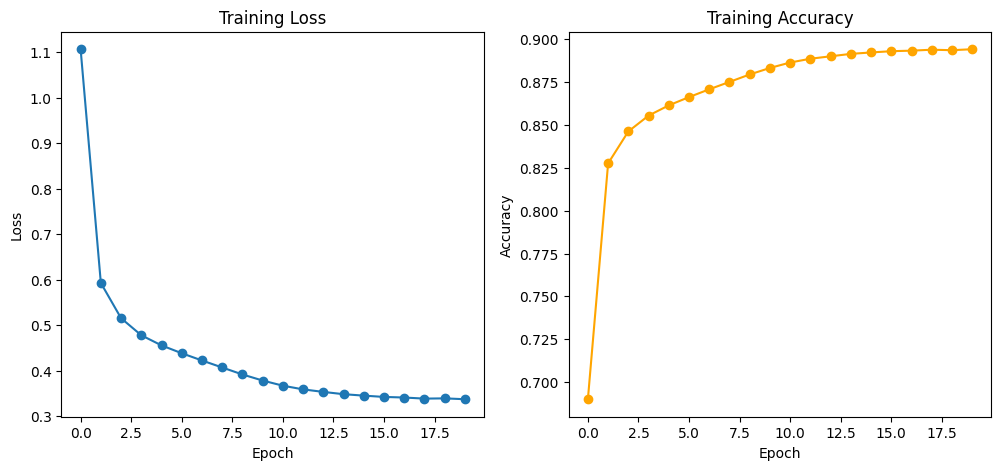

In [160]:
# 11. Plot Training Loss and Accuracy

plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], marker='o')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['sparse_categorical_accuracy'], marker='o', color='orange')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.show()


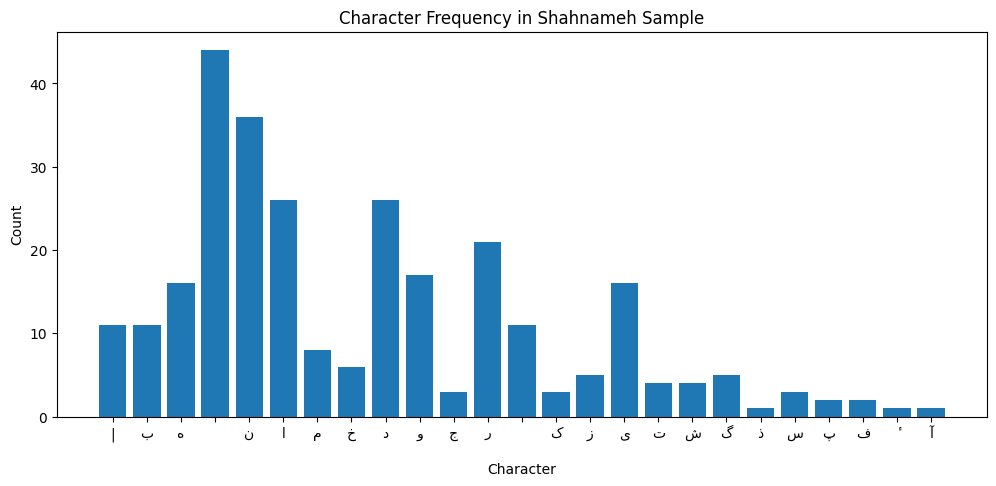

In [161]:

# 12. Optional: Visualize Character Frequencies

from collections import Counter

# Decode the first 500 characters to string
text_sample = shahnameh[:500].decode('utf-8', errors='ignore')
counter = Counter(text_sample)

chars = list(counter.keys())
counts = list(counter.values())

plt.figure(figsize=(12,5))
plt.bar(chars, counts)
plt.title("Character Frequency in Shahnameh Sample")
plt.xlabel("Character")
plt.ylabel("Count")
plt.show()


In [162]:
# 13. Visualize Generated Text Progress

generated_texts = []
prompt = "شاهنامه:"
input_ids = [char_to_id.get(c, 0) for c in prompt]
state = np.zeros((1, hidden_dim))
generated_ids = []

for token_id in input_ids:
    inputs_batch = np.expand_dims([token_id], axis=0)
    predictions, state = generation_model.predict((inputs_batch, state), verbose=0)

max_length = 250
interval = 50  # show generated text every 50 characters

for i in range(max_length):
    next_char_id = int(np.argmax(predictions, axis=-1)[0])
    generated_ids.append(next_char_id)
    inputs_batch = np.expand_dims([next_char_id], axis=0)
    predictions, state = generation_model.predict((inputs_batch, state), verbose=0)

    if (i+1) % interval == 0:
        text_segment = "".join([id_to_char[id_] for id_ in generated_ids])
        generated_texts.append(text_segment)

# Plot generated text segments
for idx, text_segment in enumerate(generated_texts):
    print(f"--- Generated text after {(idx+1)*interval} characters ---")
    print(text_segment)
    print("\n")


--- Generated text after 50 characters ---
                                                  


--- Generated text after 100 characters ---
                                                                                                    


--- Generated text after 150 characters ---
                                                                                                                                                      


--- Generated text after 200 characters ---
                                                                                                                                                                                                        


--- Generated text after 250 characters ---
                                                                                                                                                                                                                                                          




In [ ]:
# 14. Define a Callback for Real-Time Plotting

import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline
from keras.callbacks import Callback

class LivePlotCallback(Callback):
    def __init__(self, interval=1):
        super().__init__()
        self.interval = interval
        self.batch_loss = []
        self.batch_accuracy = []

    def on_train_batch_end(self, batch, logs=None):
        logs = logs or {}
        self.batch_loss.append(logs.get('loss'))
        self.batch_accuracy.append(logs.get('sparse_categorical_accuracy'))

        if batch % self.interval == 0:
            clear_output(wait=True)
            plt.figure(figsize=(12,4))

            # Loss
            plt.subplot(1,2,1)
            plt.plot(self.batch_loss, label='Batch Loss')
            plt.title('Batch Loss')
            plt.xlabel('Batch')
            plt.ylabel('Loss')
            plt.legend()

            # Accuracy
            plt.subplot(1,2,2)
            plt.plot(self.batch_accuracy, label='Batch Accuracy', color='orange')
            plt.title('Batch Accuracy')
            plt.xlabel('Batch')
            plt.ylabel('Accuracy')
            plt.legend()

            plt.show()

# Please run the next cell and see results alive and enjoy!

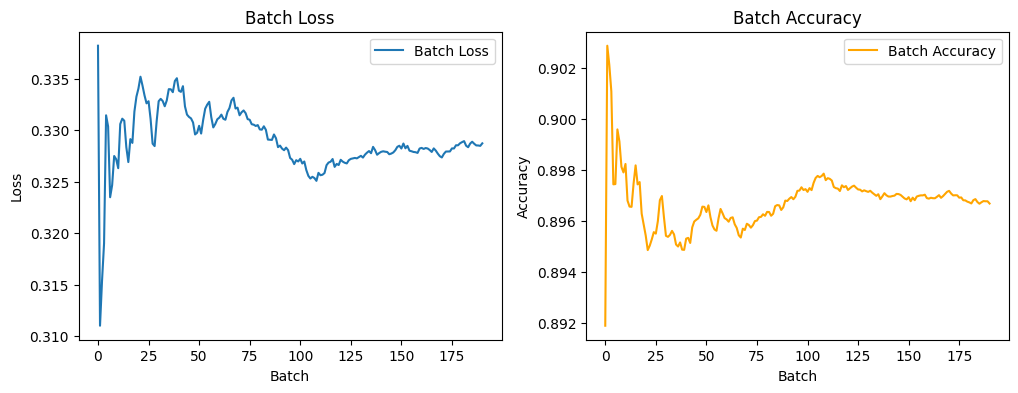

199/728 ━━━━━━━━━━━━━━━━━━━━ 7:53 895ms/step - loss: 0.3290 - sparse_categorical_accuracy: 0.8967

In [ ]:
# 15. Train the Model with the Live Plot Callback

live_plot = LivePlotCallback(interval=10)  # Update plot every 10 batches

epochs = 5  # smaller for demo, you can increase
model.fit(training_data, epochs=epochs, callbacks=[live_plot])
